# Bin Packing Lab

- Authors:
  - Wenyu Yin, yinw7@mcmaster.ca
  - Xiang Zhang, zhanx326@mcmaster.ca
- Group ID on Avenue: Group 30
- Gitlab URL: https://gitlab.cas.mcmaster.ca/zhanx326/l2-bin-packing

## T1

In [3]:
# New DatasetReader to read the Jburkardt dataset
from macpacking.reader import DatasetReader, JburkardtReader

dataset = '_datasets/jburkardt/p01_'
reader: DatasetReader = JburkardtReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/jburkardt/p01_
  - Bin Capacity: 100
  - Objects to pack: [3, 7, 11, 33, 33, 33, 50, 60, 70]


In [4]:
# The most terrible online bin-packing algorithm
from macpacking.algorithms.online import WorstOnline as on_w
from macpacking.reader import DatasetReader, BinppReader
from macpacking.model  import Online

dataset = '_datasets/binpp/N1C1W1/N1C1W1_A.BPP.txt'

reader: DatasetReader = BinppReader(dataset)
strategy: Online = on_w()
sol = strategy(reader.online())

# Or use our algo_runner util
# from utils.algo_runner import run_on
# sol = run_on(on_w, dataset)

print(f'Solution: {sol}')
print(f'Number of Bins: {len(sol)}')

Solution: [[42], [46], [56], [76], [92], [11], [40], [86], [33], [67], [30], [51], [74], [96], [22], [23], [85], [44], [27], [99], [14], [61], [28], [7], [20], [30], [33], [52], [49], [17], [10], [25], [29], [13], [72], [3], [7], [96], [40], [24], [92], [28], [91], [87], [69], [67], [62], [99], [88], [21]]
Number of Bins: 50


### Analysis

### How does the code follows the SOLID principles?
- Single Responsibility
    - The code has separate classes for loading data and algorithm, respectively, and each class is responsible for implementing its own task. For example, for reading datasets, there is a DatasetReader with two separate functions to generate correct formatted inputs for the online and offline algorithms. To retrieve capacity and weights from a file, the code uses another class extended from DatasetReader. There are also different classes for different implementations of algorithms. It improves the code's readability and reduces code redundancy so that each function does not have excessive lines of code. New algorithms can be easily added without unexpected side effects since each function has no overlapping implementation.
- Open and Close
    - The basic DatasetReader abstract class has two methods that produce inputs for online and offline algorithms. These methods are statics and will not be modified; thus, closed for modification. On the other hand, the DatasetReader class also has the \_load_data_from_disk private method, which is the only method that any additional file readers need to implement. Thus, it is convenient for programmers to extend the variety of algorithms, that is, open for extension.
    - For similar reasons, the model basic abstract class is also open for extension and closed for modification since any concrete implementation of it shares the same \_\_call\_\_ method (close for modification) while having its individual \_process methods (open for extend).
 - Dependency Inversion
    - To load data into offline and online algorithms, the \_load_data_from_disk method is called to extract information from various files. It is worthy-noticing in this process that we are calling this method from the abstract class level rather than calling a specific method that depends on any implementation of the abstract class. As a result, online and offline algorithms can obtain the required values without knowing how \_load_data_from_disk is implemented. In other words, the loading data process depends on the \_load_data_from_disk abstract method instead of its implementation, and for this reason, the dependency chain in the program logic is inverted.
    - For similar reasons, when we run an algorithm, we call its \_process abstract method (technically, we call the instance as a method) instead of its implementation, so any high-level calls of algorithms are not affected by low-level modifications. 

### Importance of using datasets of different dimensions
- Binpp Dataset
    - Possible numbers of items are 50, 100, 200, and 500, the capacity of bins is between 100 and 150, and the weights of items approximately lie between 10 and 100 (lower bound could vary). The dataset contains test files with various combinations of the item number, capacity, and possible weights.
- Binpp-hard Dataset
    - Contains a similar number of items to the Binpp dataset but comes with a much larger capacity per bin (i.e., 100000) and a larger weight of each item (i.e., between 20000 and 35000)
    - Guarantees the tested weights are generated with a wide distribution compared to the previous dataset.
- Jburkardt Dataset
    - The range of the number of items, the capacity of bins, and item weight are similar to the Binpp dataset. However, the optimal solutions for the Binpp dataset mainly load less than five items per bin, while that number frequently goes above five in the Jburkardt dataset.

It is crucial to test algorithms on various dimensions because an algorithm can achieve unexpectedly outstanding performance in some cases while poorly performing in others. Therefore, testing algorithms on more dimensions help to ensure fairness among algorithms and reduce the bias during benchmarking them. Furthermore, multi-dimension test cases aid us in acquiring a more thorough understanding of the algorithms' performances, offering us a detailed analysis of them.

## T2

### Measuring and Plotting KPIs

****** Benchmarking 50 items, 100 capacity, [1, 100] weights ******
Offline NextFit           average number of bins:                32.45
                          average unused room:                   21.76
                          standard deviation of loads:            14.6
Offline FirstFit          average number of bins:                 27.6
                          average unused room:                    7.83
                          standard deviation of loads:           12.44
Offline BestFit           average number of bins:                27.35
                          average unused room:                     7.0
                          standard deviation of loads:           12.97
Offline WorstFit          average number of bins:                 27.4
                          average unused room:                    7.19
                          standard deviation of loads:            4.88
Online NextFit            average number of bins:                 34.1
         

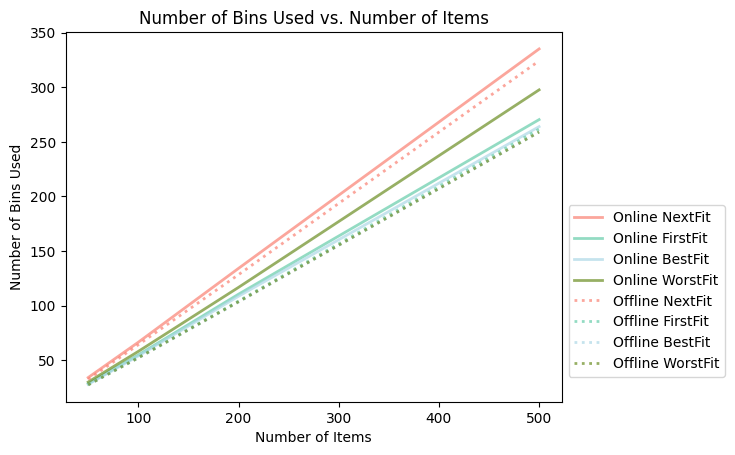

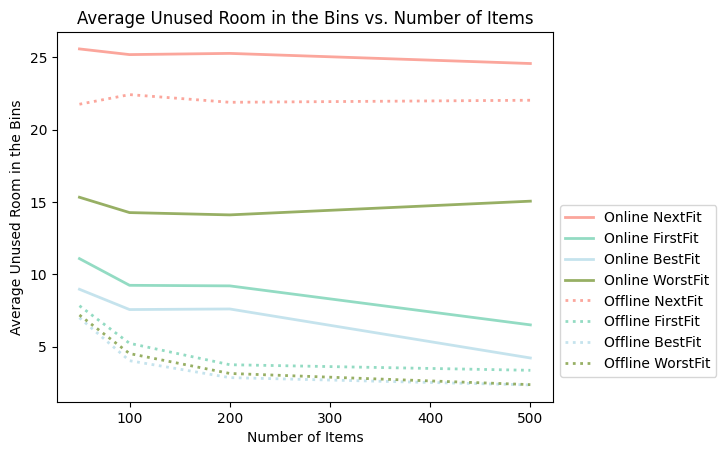

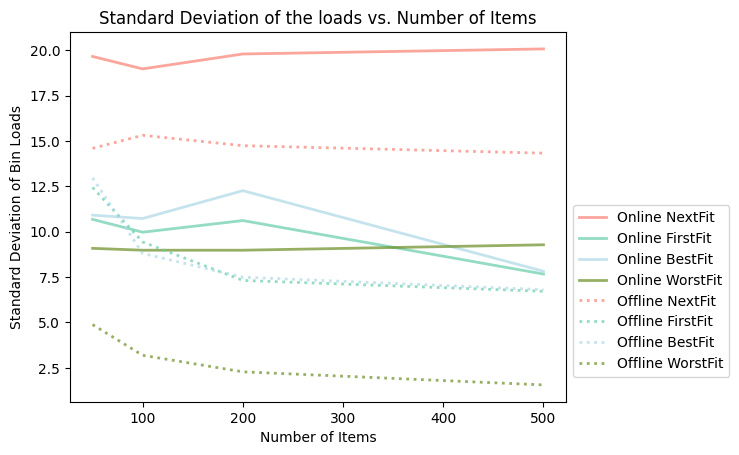

In [5]:
# Measure KPI of Algorithms
# KPI1: Number of Bins Used
# KPI2: Average Unused Space in Bins
# KPI3: Standard Deviation of Loads in the Bins

from benchmarking.solution_kpi import BenchMarking
from macpacking.algorithms.online import NextFit as on_nf, FirstFit as on_ff, BestFit as on_bf, WorstFit as on_wf
from macpacking.algorithms.offline import NextFit as off_nf, FirstFit as off_ff, BestFit as off_bf, WorstFit as off_wf

# Create an object for benchmarking
# Benchmarking(min_n, max_n, min_c, max_c, min_w, max_w, [offline algorithms], [online algorithms])
bm = BenchMarking(1, 4, 1, 1, 1, 1, [off_nf, off_ff, off_bf, off_wf, on_nf, on_ff, on_bf, on_wf])
bm.do_benchmark()

### KPIs Analysis
1. **Number of Bins Used**
    - The graph demonstrates how the number of bins used changes as the number of items needed to pack changes while the capacity of the bin and weight range is fixed. Each line represents the relation for different algorithms, and the number of bins used goes up proportionally to the increment of the number of items for all algorithms. Since the capacity and weight range do not change, when there are more items had to be packed, it is intuitive to conclude that the number of bins requested will increase.
    - Overall, offline algorithms use remarkably fewer bins than online algorithms because the offline algorithm sorts the item reversely and packs the items in the order, which allows the offline algorithm to see all the items before placing them into the bins unlike the online algorithm. Intuitively, when online algorithms encounter a large-weight item lately in a sequence, the algorithms will struggle to find a suitable bin for it, and by a great chance, they will create a new bin for the large-weight item. However, offline algorithms handle the large items first since the sequences are reversely sorted. They can create bins for large items before placing other items, and fill in the unused space with less-weighted items later in the sequence. Therefore, offline algorithms typically have better performance in terms of the number of bins used because they smartly use small items to fill up the bins.
    - According to the number of bins used, it is obvious that three algorithms have worse performance than others (Online NextFit < Offline NextFit < Online WorstFit). And that can conclude that the Nextfit algorithm uses the most bins because it does not consider the situation when the packing item cannot fit in the current bin but can fit in previous bins, wasting lots of space. The next worst algorithm is Online WorstFit. It fits the current item into the bin with the largest unused space. As a result, the small items come early may occupy the space that larger items could have fit in, and consequently, we have to create a new bin for those larger items. This explains its poor online version performance.
    - Other five algorithms have a very similar output for the number of bins used, except Online FirstFit has slightly worse performance. Therefore, we use two other KPIs to further distinguish and analyze each algorithm's performance.

2. **Average Unused Room in the Bins**
    - Generally, the average unused room in a bin stays stable while the number of items increases, except for 50 items, where more than half of the algorithms occupy less space in bins on average. Additionally, the unused room performance of algorithms mostly aligns with their performances in the number of bins used. This makes sense as when the solution has less unused room in each bin, each bin achieves a higher utilization ratio, and intuitively, fewer bins are required to hold all items.
    - Offline algorithms typically take up more space in a bin, which has better performance than the online algorithms. More specifically, Online BestFit utilizes space more wisely than Online FirstFit. It is an expected and reasonable result that BestFit chooses the bin with the least remaining space after adding the item while FirstFit places the item in the first fit bin among previously created bins. Since the smallest empty space is left for the BestFit algorithm, the average unused room will be less.
    - Other three offline algorithms have similar outputs, and Offline FirstFit has worse performance than the other two due to the above reason. Additionally, Offline BestFit and Offline WorstFit has almost the same outputs __as the ascending number of items__, especially for cases when the number of items is greater than 300. Therefore, we will consider the third KPI, standard deviation of the loads for further analysis.

3. **Standard Deviation of the Loads**
    - The general performances of algorithms are similar to other KPIs with a bit of "strange" behavior for particularly small N and large N. Specifically, offline FirstFit and BestFit perform unexpectedly disappointingly at N = 1, and online BestFit and FirstFit outperform online WorstFit only when N = 4. Below we explain the reason for these anomalous situations.
    - For N = 1, there could be cases where we have a couple of small items at the end of the item sequence that cannot fit into any bins. As a result, the bins are either filled or almost empty. Additionally, since N is small, the number of bins required is relatively small, and it is unable to balance out the large numerator in the standard deviation formula. These extreme cases deviate from the average values of the standard deviation and result in irregularity.
    - For N = 4, similarly, there may be extreme cases where BestFit and FirstFit result in outstandingly balanced weights and these cases lower the average standard deviation of BestFit and FirstFit.
    - One additional worth-noting phenomenon in this KPI is that Offline WorstFit performs significantly better than the rest of the algorithms. Therefore, this KPI is the best demonstration of the ability of Offline WorstFit to use small items to fill in the gaps.

### Measuring and Plotting Execution Time

Online NextFit at HARD0.BPP.txt's average execution time is 3.725648371380452e-07
Online FirstFit at HARD0.BPP.txt's average execution time is 3.543019453682827e-07
Online BestFit at HARD0.BPP.txt's average execution time is 6.845671717321348e-07
Online WorstFit at HARD0.BPP.txt's average execution time is 6.889233716333987e-07
Online RefinedFirstFit at HARD0.BPP.txt's average execution time is 7.956743621817992e-07
Offline NextFit at HARD0.BPP.txt's average execution time is 4.506159790042356e-05
Offline FirstFit at HARD0.BPP.txt's average execution time is 0.0026418801562490065
Offline BestFit at HARD0.BPP.txt's average execution time is 0.0018895118749971591
Offline WorstFit at HARD0.BPP.txt's average execution time is 0.001184402174479023


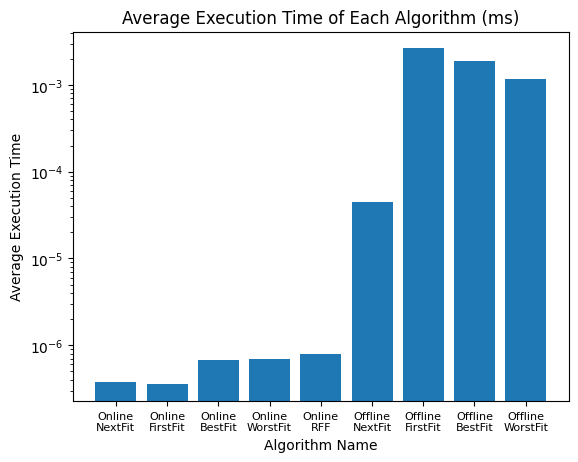

In [6]:
from benchmarking.read_result import ExecutionAnalyzer
from os.path import exists

# Read from output file
datafile = 'outputs/exec_out.json'

# Create an outfile file if it does not exist
if not exists(datafile):
    !{'python exec_time_bench.py -o outputs/exec_out.json'}
    
analyzer = ExecutionAnalyzer(datafile)
analyzer.plot_measurement()

### Execution Time Analysis
- The graph illustrates the logarithm (to enhance the readability) of the average execution time (ms) of each algorithm. It is noticeable that all Offline algorithms have longer execution time compared to Online algorithms, because Offline algorithms have to sort the list of items which takes O(NlogN) extra where N is the number of packing items.  

- Online NextFit uses a for loop to iterate through each item which requires only O(N) to process N items, and Online FirstFit has a similar execution time. Although it uses another while loop to go through each solution bin to find the first bin that can be fitted in, the break statement will stop the current loop after finding the right bin, the general execution time will be similar to O(N) as NextFit compared to O(N^2) worst case. It is also intuitive that Online BestFit and WorstFit have similar execution times, and are obviously longer than NextFit and FirstFit algorithms. Both of them take an additional while loop to iterate through all solution bins to find the corresponding correct bin, totally running O(N^2).  

- Offline NextFit has the least running time among Offline algorithms because of using only a single loop to go through each item. The other three algorithms have similar execution times, and it is caused by the same reason above that they all use another while loop to iterate through all solution bins. However, compared to Online FirstFIt, Offline FirstFit executes with the longest running time as it goes through the sorted items reversely. The algorithm starts from the largest item, therefore, the first fitted bin will locate at the latter part instead of at the beginning. It becomes more likely for the while loop to execute more iterations. Moreover, the execution time decreases in the order Offline FirstFit > Offline BestFit > Offline WorstFit due to the decreasing number of bins created. When the number of solution bins becomes smaller, the length of the second while loop will decrease and reduces the execution time at the same time.

### Why did we use the specific dataset to run execution time test
There are several decisions we made when we analyzed the algorithms' execution time.

1. We ran each algorithm on one file rather than multiple files.
    - Since some algorithms may have incredible performance in specific datasets (e.g., NextFit's performance highly depends on the input stream), running algorithms on various datasets may lead to bias, making it hard to tell how the algorithms actually perform. All unnecessary bias can be eliminated if we run algorithms on the same file, and it is obvious to find out which algorithms outperform others.
2. We ran the algorithms on 'HARD0.BPP.txt'
    - The majority reason for us to use this dataset is that it contains more items than the others. The algorithms typically need more time to traverse the items' weights when there are more items. As a result, this dataset enlarges the difference between algorithms' execution times and makes it easier for us to conclude which algorithm performs the best.

## T3

### Read Oracle Files and Measure Margin of Improvement

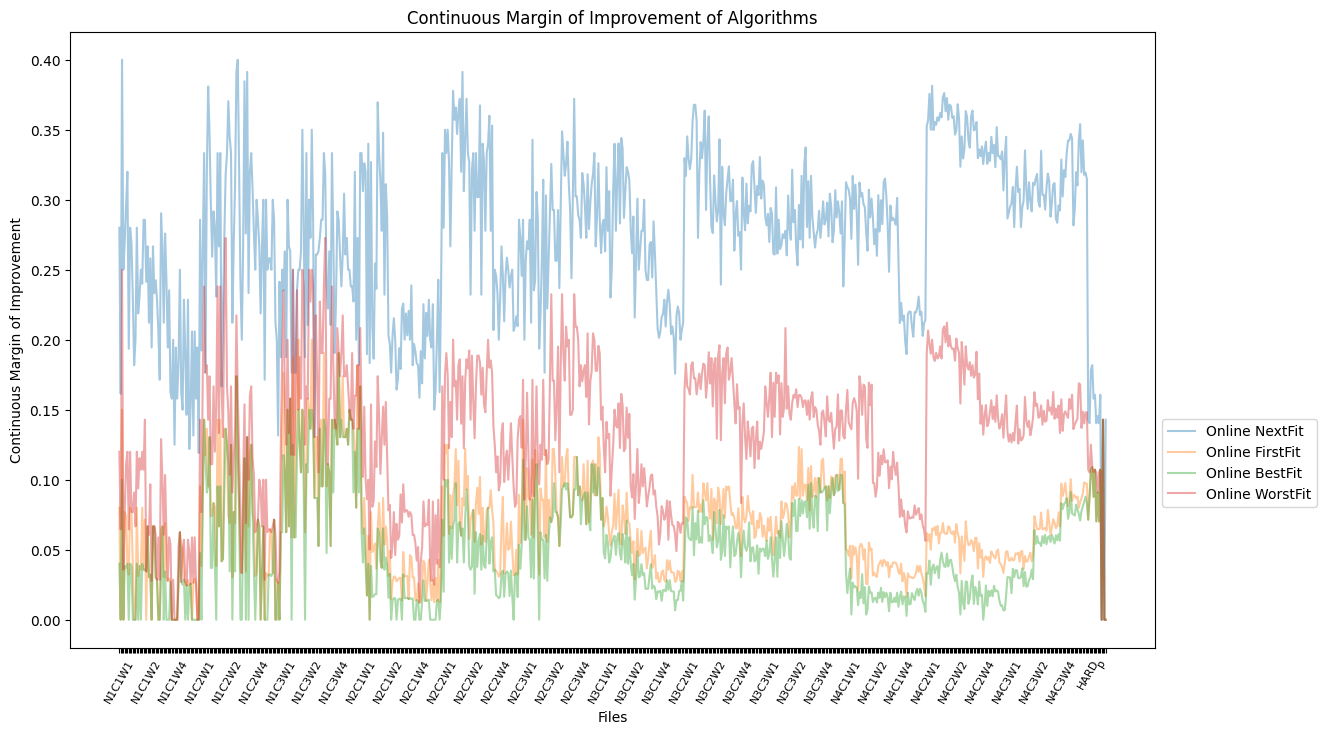

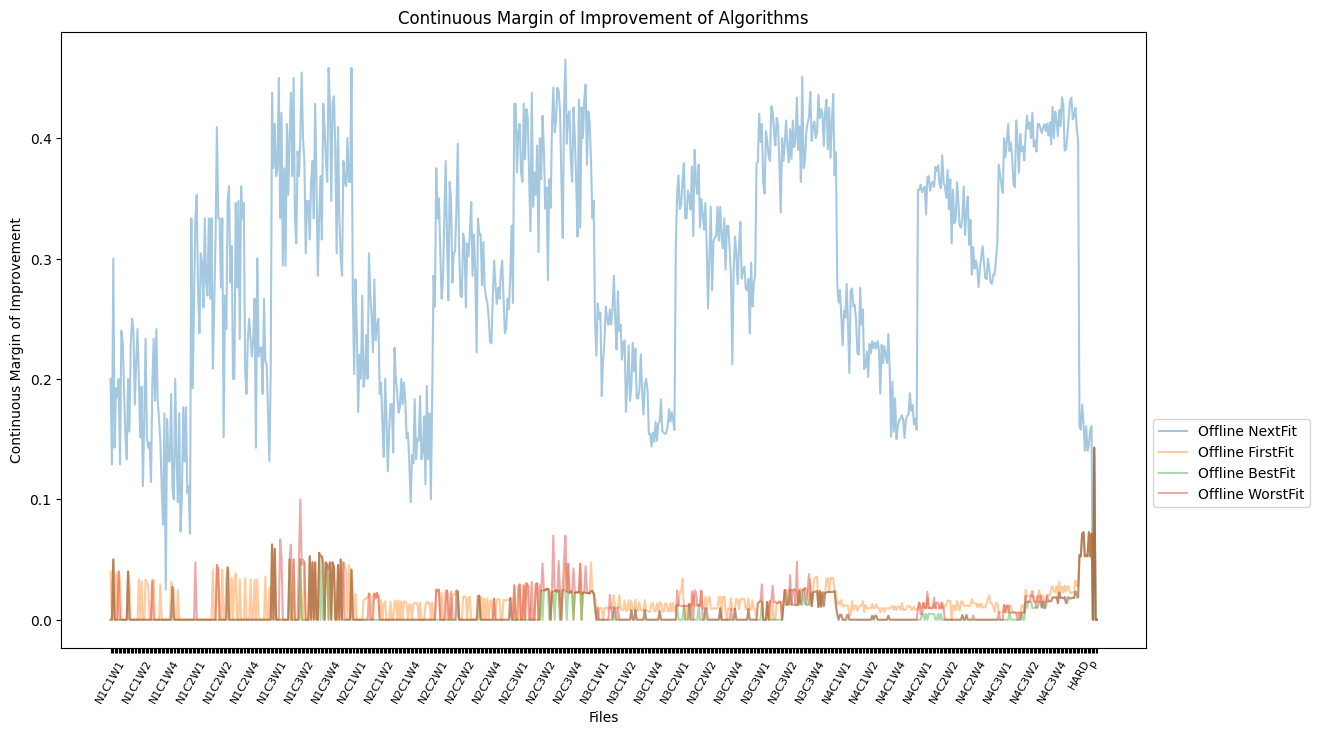

In [7]:
from macpacking.analyst import Analyst
from macpacking.algorithms.online import NextFit as on_nf, FirstFit as on_ff, BestFit as on_bf, WorstFit as on_wf
from macpacking.algorithms.offline import NextFit as off_nf, FirstFit as off_ff, BestFit as off_bf, WorstFit as off_wf

# Initialize algorithms

onlines = [on_nf, on_ff, on_bf, on_wf]
offlines = [off_nf, off_ff, off_bf, off_wf]

analyst = Analyst(offlines, onlines, ['binpp', 'binpp-hard', 'jburkardt'])
analyst.obtain_op_results()

# Run this to obtain results of all algorithms
# analyst.obtain_results()
# Different ways to measure the margin of improvements
# analyst.discrete
# analyst.continuous
# analyst.normalize_contiuous

# Run this to write results to .json files (Run obtain_results() before this!)
# analyst.write_result()

# Plot the results
analyst.plot_result()

### Analysis of Problematic (Class of) Cases
In this analysis, we normalized the continuous margin of improvement since the margins are more likely to be greater in larger datasets. This is achieved by dividing the (algorithm result - optimal result) by (optimal result) to eliminate the effect of the datasets' size. As a result, by inspecting the resulting graph (an annotated version is shown below), we found the following problematic cases.

1. Jburkardt
    - Almost all the algorithms are able to achieve the optimal solution in this dataset, particularly p_01, p_02, and p_03. We suppose the main reason is that the number of items in these datasets is relatively small, and there are only a few ways for the algorithms to load the weights. We also found out that these datasets are designed in a way that some weights add up just over the bin's capacity. As a result, the ways to load weights are further restricted. Subsequently, the majority of the algorithms will have the same solution for these datasets, and they are all identical to the optimal solution. Online NextFit, on the other hand, considering that its performance highly depends on the order of the input stream and its lack of ability to insert every examined weight into an appropriate bin, it is understandable that it still performs poorly in one of the cases.
2. Binpp folder N1C1W4
    - A larger W-value stands for greater minimal weights of items, while a small C-value stands for less capacity of bins. For datasets in N1C1W4, the weights of items range from 30 to 100, and the  capacity is 100 for each bin. As a result, no matter how the algorithms attempt to look for an appropriate bin to insert a weight, it is very unlikely for them to find an existing bin with sufficient room to load it. Therefore, most of the bins in the solutions contain one or two items, and every algorithm generates a similar solution to the optimal solution. This serves as a general trend for  datasets in N\<n\>C1W4.
    - On a side note, a large W-value doesn't always imply a high probability of achieving optimal solutions. A small C-value is also required to limit the average number of items per bin. This provides the explanation for greater deviations from the optimal solutions in the N1C*3*W4 dataset.
3. Binpp folders N4C2W2, N4C3W2
    - Conversely, the cases inside folders N4C2W2 and N4C3W2 have different outputs for the NextFit algorithm from the above cases. The NextFit algorithm performs significantly poorly in these cases compared to other algorithms. Due to a similar reason, when capacity becomes larger while minimal weight is smaller, other algorithms will find solutions with fewer bins and each bin contains more items. However, The NextFit algorithm does not attempt to refill the previous bins, which results in more bins with fewer items. Therefore, the difference between the performance of NextFit and that of other algorithms is more observable in these cases.

The biggest takeaway from this task is that, generally, when the items in a dataset possess a greater minimal weight, algorithms tend to achieve a better performance since items are packed as groups of one
or two. The effect diminishes as the capacity of bins becomes larger as it allows bins to load more items, and more possibilities exist for algorithms to load items. Additionally, for small N-values, 
algorithms are more likely to obtain optimal solutions.

<!-- <img src="C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l2-bin-packing\src\images\problematic_cases.jpg"
     alt="Problematic Cases"
     style="width:900px; height: auto;" /> -->
![Problematic Cases](C:\Study\University\Third_Year_Fall_Term\SFWRENG 3XB3\l2-bin-packing\src\images\problematic_cases.jpg)

## T4

### Benchmark Refined FirstFit Algorithm

****** Benchmarking 50 items, 100 capacity, [1, 100] weights ******
Offline NextFit           average number of bins:                32.45
                          average unused room:                   21.76
                          standard deviation of loads:            14.6
Offline FirstFit          average number of bins:                 27.6
                          average unused room:                    7.83
                          standard deviation of loads:           12.44
Offline BestFit           average number of bins:                27.35
                          average unused room:                     7.0
                          standard deviation of loads:           12.97
Offline WorstFit          average number of bins:                 27.4
                          average unused room:                    7.19
                          standard deviation of loads:            4.88
Online NextFit            average number of bins:                 34.1
         

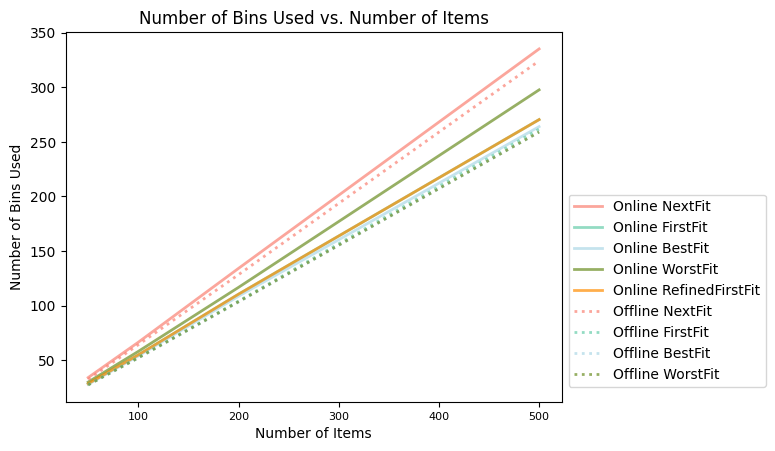

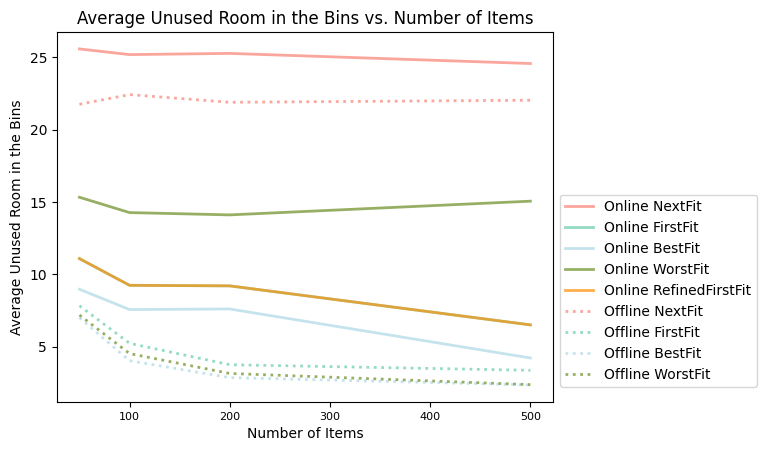

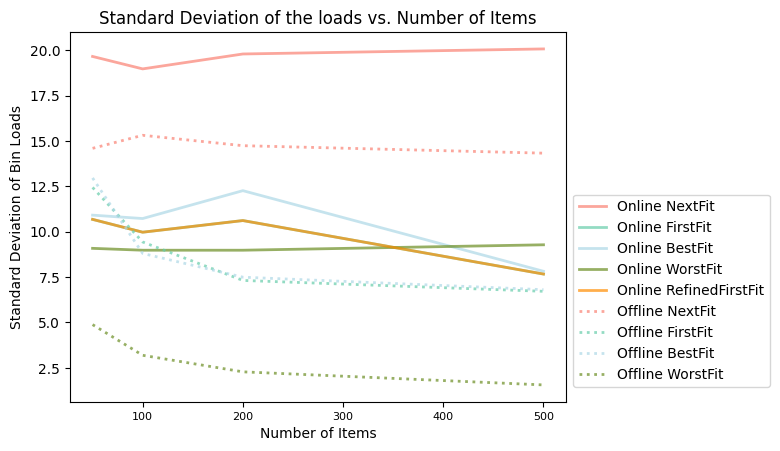

In [8]:
from macpacking.algorithms.online import NextFit as on_nf, FirstFit as on_ff, BestFit as on_bf, WorstFit as on_wf, RefinedFirstFit as on_rff
from macpacking.algorithms.offline import NextFit as off_nf, FirstFit as off_ff, BestFit as off_bf, WorstFit as off_wf
from benchmarking.solution_kpi import BenchMarking

# Compare refined first fir with other algorithms
bm = BenchMarking(1, 4, 1, 1, 1, 1, [off_nf, off_ff, off_bf, off_wf, on_nf, on_ff, on_bf, on_wf, on_rff])
bm.do_benchmark()

### Analysis of the Result

- After we integrated the Online Refined FirstFit algorithm's performance with the previous KPIs graphs, we can see that this new algorithm performs poorly in the cases, and there is barely any improvement from the original Online FirstFit.  

- In the first graph, the number of bins used by Online Refined FirstFit is almost the same as Online FirstFit, the two lines overlap with each other. It is not surprising since both algorithms perform the task using the FirstFit algorithm. And Refined FirstFit only has extra steps trying to divide the items into different categories and using the items in the B2 class to refill the bins for the A1 class to reduce the number of bins used. If this does not make any improvement on the packing, this algorithm only spends extra efforts on categorizing all items and bins into 4 different classes, which does not make a significant difference.  

- And the way this new algorithm implements this refilling is using heuristics (using mk th items in B2 and m is 6,7,8,9). Therefore, to make this heuristics useful, there need to be at least 6 elements that belong to B2 class. As the number of items in the dataset increases, more items will be categorized into the B2 class. That's the reason why the average unused room for bins remarkably decreases as the number of items increases.  

- Even though the number of items is large enough to have more B2 elements to refill the gaps of bins in the A1 class, the only improvement this new algorithm can achieve is to use ~4/10 elements (approximate 4 items in every 10 items) in B2. On the other hand, we lose the advantage of doing FirstFit on all bins as it is done in four parts separately. Combining the bare improvement and the unexpected disadvantage in the FirstFit domain, it is hard for Refined FirstFit to achieve better performance.  

- The execution time for the Refined FirstFit algorithm is higher than the original FirstFit, which is reasonable because it spends more time normalizing and checking items' classes with additional conditions.

## T5

****** Benchmarking 50 items, 100 capacity, [1, 100] weights ******
ExtendOffline Partitioning average number of bins:                27.25
                          average unused room:                    6.58
                          standard deviation of loads:            3.65
ExtendOffline GNP         average number of bins:                27.25
                          average unused room:                    6.58
                          standard deviation of loads:            3.65
Offline WorstFit          average number of bins:                 27.4
                          average unused room:                    7.19
                          standard deviation of loads:            4.88
Online FirstFit           average number of bins:                28.55
                          average unused room:                   11.09
                          standard deviation of loads:           10.68

****** Benchmarking 100 items, 100 capacity, [1, 100] weights ******
ExtendOff

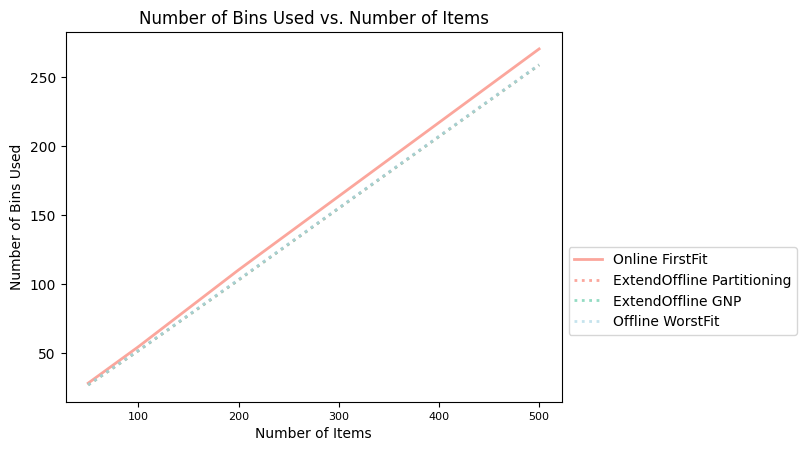

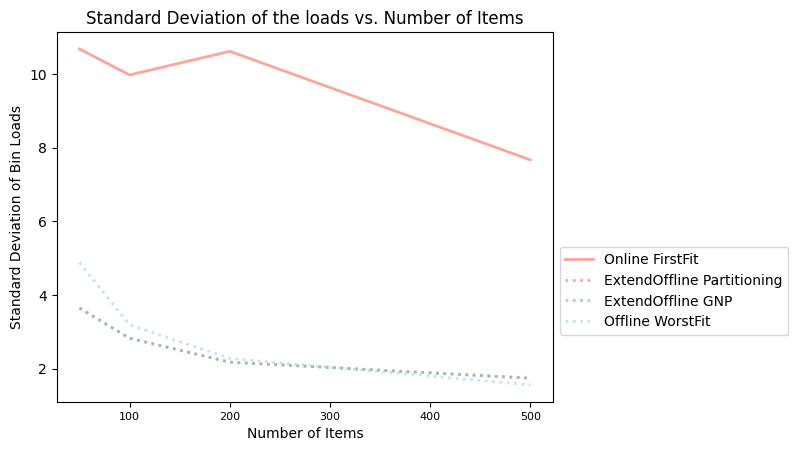

In [9]:
from macpacking.algorithms.offline import GNP as gnp
from macpacking.algorithms.baseline import Partitioning as partition

# Measure KPI of Algorithms
# KPI1: Number of Bins Used
# KPI2: Average Unused Space in Bins
# KPI3: Standard Deviation of Loads in the Bins

from benchmarking.solution_kpi import BenchMarking
from macpacking.algorithms.online import NextFit as on_nf, FirstFit as on_ff, BestFit as on_bf, WorstFit as on_wf
from macpacking.algorithms.offline import NextFit as off_nf, FirstFit as off_ff, BestFit as off_bf, WorstFit as off_wf

# Create an object for benchmarking
# Benchmarking(min_n, max_n, min_c, max_c, min_w, max_w, [offline algorithms], [online algorithms])
bm = BenchMarking(1, 4, 1, 1, 1, 1, [partition, gnp, off_wf, on_ff])
bm.do_benchmark(ur=False)

### Reusability of Code
- To analyze the performance in T5, the only KPI we need to consider is the standard deviation since the number of bins in this problem is constant due to the nature of the problem, and our algorithm has to ensure the loads in each container are balanced. In our previous benchmarking, we evaluated and plotted three KPIs(num of bins, average unused room, standard deviation) by running needed algorithms in 'Binpp' folders and storing all results in a dictionary. There are also plotting algorithms containing three boolean variables indicating which KPI will be displayed (nob, nr, stdv). For this reason, we can run different customized benchmarking by using different algorithms and getting other KPIs if utilizing it with the correct format. Therefore, in this case, we only need to run the same benchmarking function using GNP algorithms and baseline to get the corresponding result dictionary. And then graph the standard deviation result by setting nob and nr to False.

- We also created a library called algo_runner to run different types of algorithms. The run_algo() and run_in_folder() functions in the library are highly generalized so that they can run the input algorithm regardless of its type (e.g., online, offline, extendOffline). Running algorithms while calculating KPIs is much more convenient, thanks to this library.

### Analysis of the Result
- The graph shows the standard deviation vs the number of items of the baseline in the python library and our implementation of the GNP algorithm. Since there is one line shown in the graph, we can conclude that the two algorithms have exactly the same result and standard deviation. Our implemented algorithm uses the greedy number partitioning algorithm, which uses an array to keep track of each bin's weight and add the following item to the bin that has minimal weight throughout the whole bins list. And this algorithm is similar to the algorithm that is used in baseline to-constant-bin-number in the bin-packing libraries. Therefore, the final results are the same for these two algorithms.

- We compare the results of these algorithms with the Offline WorstFit as the classical bin packing algorithm since it has the best overall performance based on our T2 investigation. From the standard deviation graph, when the number of items is less than 200, GNP will generate the sets of bins with more balanced loads compared to WorstFit. However, when the number of items is greater than 200, WorstFit can generate the sets of bins with a lower standard deviation. From the graph of the number of bins, we can see that WorstFit generates almost the same number of bins as the GNP algorithm, and in the meantime, the GNP algorithm uses the optimal number of bins as the fixed bin number. However, based on the continuous results from T3, Offline WorstFit only sometimes generates the optimal number of bins. Therefore, when WorstFit uses more bins than the optimal number of bins, it will decrease the standard deviation of this set of bins, which is the reason why WorstFit can generate more balanced solutions than GNP.

## Self-reflection questions

- __What process did you go through to produce this result? (Backward)__
    - WY: To produce this result, I went through the process and started at understanding the given code and structures. After I get more ideas about the provided code base and understand the expected result of each task, I started to think about the implementation and how to design the structures of classes/functions. Based on the discussion and research on the question, we implement the actual code including graphing the results. Finally, we analyzed our results and enhanced the code by simplifying redundant codes.
    - XZ: I went through approximately four stages. In the first stage, I did some basic planning on the project's structure and understood the code base. After that, I started to do some research on relative algorithms and their implementations. I came up with multiple KPIs and use them to quantify the performance of algorithms in the next stage. I expanded the domain of this project to relative problems as well. As a close-up, I performed a check on the code our team wrote and reflected on our accomplishments.
- __What were your standards for this piece of work? Did you meet your standards? (Inward)__
    - WY: My standards for this work includes an organized code structure without any redundant and repetitive work, well-defined relevant benchmark, and KPIs that can clearly demonstrate algorithm's performance and users can use libraries easily.   
          I think our work meets most of the standards. We involve three KPIs (num of bins used, average unused room, and standard deviation) in the benchmark, which is helpful for analyzing each algorithm with sufficient data support. And the graph uses different line type to distinguish online and offline algorithms. We also encapsulate many running algorithms into one main function so that we can run the code conveniently using that one function. However, there is room for improving the code structures.
    - XZ: My standard for this piece of work contains several points.
        1. All functionalities of the project need to be well-modularized.
        2. Readability of the code is enhanced in some ways.
        3. People can easily add more features to what our team has done.  
      We meet most of our standards. However, there are some functions (e.g., plotting) that still contain large blocks of code and are challenging to be reduced as more helper functions need to be defined, which could sacrifice some readability. If more time is given, we could come up with a more efficient way to implement those functionalities.
- __What the one thing you particularly want people to notice when they look at your work? (Outward)__
    - WY: We have an Analyst class that will obtain the discrete and continuous results for T3 and stores them in a dictionary. It reduces the complexity and time to run the code repeatedly to get results (it takes more than a minute to do so.). Users don't have to generate the result every time, and if a file exists, they can directly load that file to the class.
    - XZ: In the BenchMarking class, we provided the user to perform benchmarking on all files in the Binpp dataset. That is, we provided users with the flexibility to observe how algorithms' performance varies with the number of items, capacity, or items' weight range. Not only users can obtain a wide range of results based on their requirements, but they can also choose which KPI they want to plot. Hence, the BenchMarking class offers users a wide range of functionalities while giving them the chance to decide what to use.
- __What lessons will you keep from this reading/lecture in your professional practice? (Forward)__
    - WY: It is crucial to design an appropriate way to analyze benchmark algorithms. A proper way to do benchmarking helps programmers understand the performance of algorithms better, and it could provide a more straightforward way to decide what algorithm to use. Also, a benchmark with multiple dimensions offers a thorough analysis of the algorithm and essentially tells us which algorithm is the most appropriate in various cases.
    - XZ: I learned that it is important to understand the entire project before getting started on any planning and implementation. Only focusing on one single step can lead to later issues, for example, it may be harder to generalize some functionalities later on. Being aware of what we need to accomplish in the future can provide me with a broader understanding of our essential goal and make it easier to generalize and modularize functionalities.